# Coursework 1: Image filtering

The coursework includes coding questions and/or written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What is expected?

* Complete and run the code using `jupyter-lab`.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01.ipynb --to pdf`

* If Jupyter complains issues during exporting, it is likely that [pandoc](https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end, alternatively, you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You may need to install [Jupyter-Lab](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [44]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import math
import time

## Q1. Moving average filtering (20 points).

Read the provided clean image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

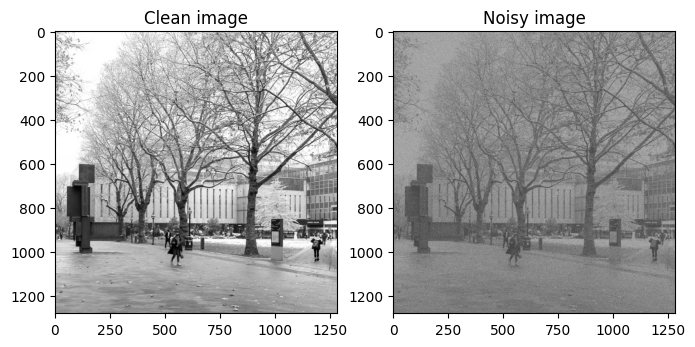

In [45]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')

# Corrupt the image with Gaussian noise (provided)
noise_mu = 0
noise_sigma = 50
noise = np.random.normal(noise_mu, noise_sigma, image.shape)
image_noisy = image + noise

# Visualise the images (provided)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Clean image')

plt.subplot(1, 2, 2)
plt.imshow(image_noisy, cmap='gray')
plt.title('Noisy image')
plt.gcf().set_size_inches(8, 4)

### Q1.1 Filter the noisy image using a 5x5 moving average filter. Display the filtered image.

Filter h = [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


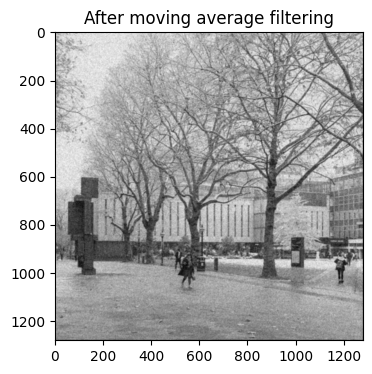

In [46]:
# Design the filter h
### Insert your code ###
h = np.array([[1/25, 1/25, 1/25, 1/25, 1/25] for i in range(5)])

# Convolve the noisy image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, 'same')

# Print the filter (provided)
print('Filter h = {0}'.format(h))

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.title('After moving average filtering')
plt.gcf().set_size_inches(4, 4)

### Q1.2 Assess the quality of the filtered image using a quantitative metric, the peak signal-to-noise ratio (PSNR).

For this case, the pixel intensity of the image is represented using the uint8 format, with the peak value to be 255. The PSNR is defined as,

PSNR = $10 \cdot log_{10} \frac{255^2}{\frac{1}{N} \sum_x [J(x) - I(x)]^2}$ 

where $x$ denotes the pixel index, $N$ denotes the total number of pixels in the image, $J$ denotes the filtered i.e. denoised image and $I$ denotes the ground truth clean image. The denominator of the term within the logarithm operator is the mean squared error between $I$ and $J$. 

You can find more detail about PSNR [here](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio).

In [47]:
# Implement the PSNR function
def eval_psnr(I, J):
    # I: the ground truth clean image (peak value: 255 for uint8 data format)
    # J: the denoised image
    #
    # return: the PSNR metric (unit: dB)
    N = np.size(I)

    Sum = np.sum(np.square(J - I))
    
    ### Insert your code ###
    psnr = 10 * np.log10(np.square(255) / ((1/N) * Sum))
    return psnr

# Evaluate the PSNR for the filtered image (provided)
psnr = eval_psnr(image, image_filtered)

# Print the PSNR (provided)
print('PSNR = {0:.2f} dB'.format(psnr))

PSNR = 18.39 dB


## Q2. Gaussian filtering (70 points).

### Q2.1 Implement a function that constructs a 2D Gaussian filter given the parameter $\sigma$.

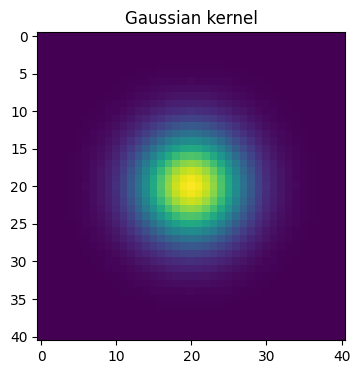

In [48]:
# Implement the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma for the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    # The filter radius is 4 times sigma (provided)
    rad = int(math.ceil(4 * sigma))
    sz = 2 * rad + 1

    constant = 1/(2*np.pi*np.square(sigma))
    
    # Calculate the filter weights
    ### Insert your code ###
    h = np.array([[constant * (np.e ** -((np.square(i - (rad)) + np.square(j - (rad)))/ (2 * np.square(sigma)))) for i in range(sz)] for j in range(sz)])
    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)
plt.title('Gaussian kernel')
plt.gcf().set_size_inches(4, 4)

### Q2.2 Perform Gaussian filtering ($\sigma$ = 5 pixels) for the noisy image, evaluate the computational time for Gaussian filtering and display the filtered image.

2.398364305496216


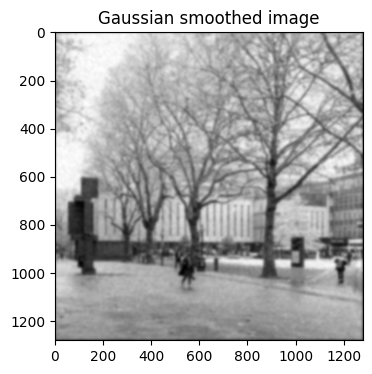

In [49]:
# Construct the Gaussian filter (provided)
sigma = 5
h = gaussian_filter_2d(sigma)

# Perform Gaussian filtering and count time
### Insert your code ###
start = time.time()
image_smoothed_2d = scipy.signal.convolve2d(image_noisy, h, 'same')
end = time.time()

print(end - start)

# Visualise the filtered image (provided)
plt.imshow(image_smoothed_2d, cmap='gray')
plt.title('Gaussian smoothed image')
plt.gcf().set_size_inches(4, 4)

### Q2.3 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Construct 1D Gaussian filters along x-axis and y-axis respectively.

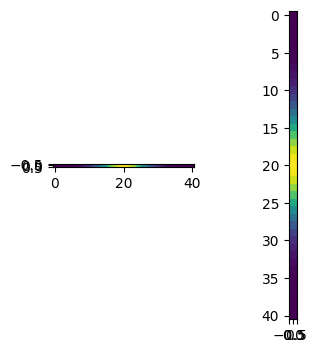

In [50]:
# Implement the 1D Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    # The filter radius is 4 times sigma (provided)
    rad = int(math.ceil(4 * sigma))
    sz = 2 * rad + 1

    constant = 1/(np.sqrt(2*np.pi)*sigma)
    
    # Calculate the filter weights
    ### Insert your code ###
    h = [[constant * (np.e ** -(np.square(i - (rad)) / (2 * np.square(sigma)))) for i in range(sz)]]
    return h

# sigma = 5 pixel (provided)
sigma = 5

# Construct the Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = gaussian_filter_1d(sigma)

# Construct the Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = np.transpose(gaussian_filter_1d(sigma))

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)

plt.subplot(1, 2, 2)
plt.imshow(h_y)
plt.gcf().set_size_inches(4, 4)

### Q2.4 Perform Gaussian filtering ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. Compare the smoothed image using separable filtering to the smoothed image using a single 2D Gaussian filter.

0.3275880813598633
Mean absolute difference = 0.000000


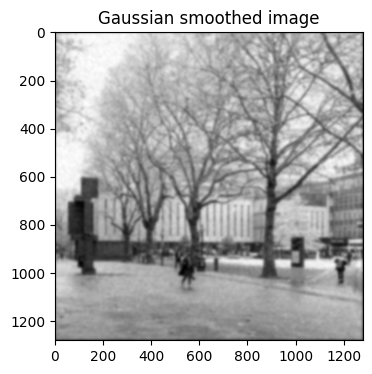

In [51]:
# Perform separable Gaussian smoothing and count time
### Insert your code ###
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, 'same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, 'same')
end = time.time()

print(end - start)

# Report the difference between the separably filtered image and the image filtered by a single 2D Gausian filter (provided)
diff = image_smoothed - image_smoothed_2d
print('Mean absolute difference = {:.6f}'.format(np.mean(np.abs(diff))))

plt.imshow(image_smoothed, cmap='gray')
plt.title('Gaussian smoothed image')
plt.gcf().set_size_inches(4, 4)

### Q2.5 Perform Gaussian smoothing for the same noisy image, assess the quality of the Gaussian smoothed image using PSNR, when different sigma values are used.

<>:20: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:20: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
/var/folders/gl/43z3gnl916gf4ljxlypcfn280000gn/T/ipykernel_3989/1241216230.py:20: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  plt.xlabel('$\sigma$ (unit: pixel)')


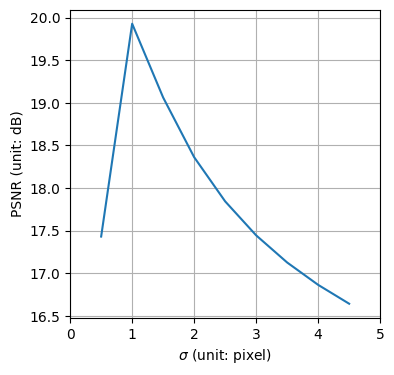

In [52]:
# A list of sigma values (provided)
list_sigma = np.arange(0.5, 5, 0.5)

# Perform Gaussian smoothing with different sigma values and record the PSNR values
### Insert your code ###
list_psnr = []
for sigma in list_sigma:
    h_x = gaussian_filter_1d(sigma)
    h_y = np.transpose(gaussian_filter_1d(sigma))

    image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, 'same')
    image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, 'same')

    list_psnr.append(eval_psnr(image, image_smoothed))


# Plot the PSNR metric against sigma (provided)
plt.plot(list_sigma, list_psnr)
plt.xlim([0, 5])
plt.xlabel('$\sigma$ (unit: pixel)')
plt.ylabel('PSNR (unit: dB)')
plt.grid()
plt.gcf().set_size_inches(4, 4)

### Q2.6 Implement 3x3 Sobel filters, perform Sobel filtering for the noisy image, and display the gradient magnitude map.

Sobel_x = [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sobel_y = [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


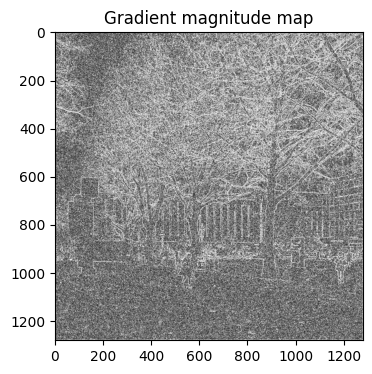

In [53]:
# Construct the Sobel filters
### Insert your code ###
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Print the filters (provided)
print('Sobel_x = {0}'.format(sobel_x))
print('Sobel_y = {0}'.format(sobel_y))

# Sobel filtering for the noisy image
### Insert your code ###
x_derivatives = scipy.signal.convolve2d(image_noisy, sobel_x, 'same')
y_derivatives = scipy.signal.convolve2d(image_noisy, sobel_y, 'same')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag_noisy = np.sqrt(np.square(x_derivatives) + np.square(y_derivatives))

# Display the magnitude map (provided)
plt.imshow(grad_mag_noisy, cmap='gray', vmin=0, vmax=500)
plt.title('Gradient magnitude map')
plt.gcf().set_size_inches(4, 4)

### Q2.7 Perform Gaussian smoothing for the noisy image, followed by Sobel filtering and display the gradient magnitude map.

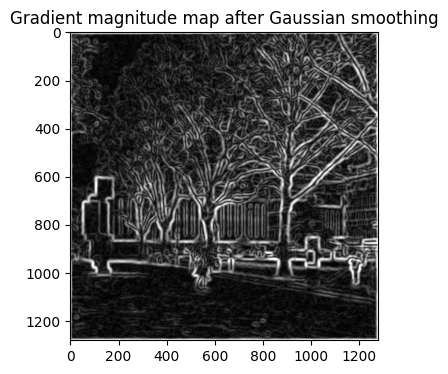

In [54]:
# Parameter for the Gaussian filter (provided)
sigma = 5

# Gaussian smoothing
### Insert your code ###
h_x = gaussian_filter_1d(sigma)
h_y = np.transpose(gaussian_filter_1d(sigma))

image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, 'same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, 'same')

# Sobel filtering
### Insert your code ###
x_derivatives = scipy.signal.convolve2d(image_smoothed, sobel_x, 'same')
y_derivatives = scipy.signal.convolve2d(image_smoothed, sobel_y, 'same')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(np.square(x_derivatives) + np.square(y_derivatives))

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.title('Gradient magnitude map after Gaussian smoothing')
plt.gcf().set_size_inches(4, 4)

## Q3. Implement image filters using Pytorch (10 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [55]:
# Import libaries (provided)
import torch

### Q3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [56]:
# Expand the dimension of the numpy array
### Insert your code ###
torch_image_noisy = np.array([[image_noisy]]).astype(np.float32)

# Convert to a Pytorch tensor using torch.from_numpy
### Insert your code ###
tensor_noisy = torch.from_numpy(torch_image_noisy)

### Q3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter, perform filtering, report computational time and display the result.

1.481459140777588


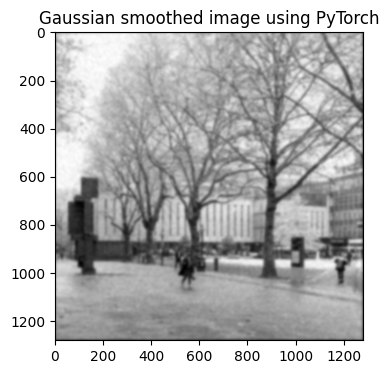

In [59]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
h = np.array([[h]]).astype(np.float32)

# Construct the Conv2D filter
### Insert your code ###
kernel = torch.from_numpy(h)
conv = torch.nn.Conv2d(1,1, kernel_size=h.shape, stride=1, padding=h.shape[-1]//2, bias=False)
kernel.requires_grad = True

with torch.no_grad():
    conv.weight = torch.nn.Parameter(kernel)

    # Filtering and assess computational time
    ### Insert your code ###

    start = time.time()
    image_filtered = conv(tensor_noisy)
    end = time.time()
    
    print(end - start)

    image_filtered = image_filtered.view(image_filtered.shape[-2:])

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.title('Gaussian smoothed image using PyTorch')
plt.gcf().set_size_inches(4, 4)